# Lab: Regression Analysis

### Before you start:

* Read the README.md file
* Comment as much as you can and use the resources (README.md file) 

Happy learning!

In [15]:
# Imports
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn.covariance import EmpiricalCovariance

## Challenge 1
I work at a coding bootcamp, and I have developed a theory that the younger my students are, the more often they are late to class. In order to test my hypothesis, I have collected some data in the following table:

| StudentID | Age | Tardies |
|--------|-----|------------|
| 1      | 17  | 10         |
| 2      | 51  | 1          |
| 3      | 27  | 5          |
| 4      | 21  | 9         |
| 5      | 36  |  4         |
| 6      | 48  |  2         |
| 7      | 19  |  9         |
| 8      | 26  | 6          |
| 9      | 54  |  0         |
| 10     | 30  |  3         |

Use this command to create a dataframe with the data provided in the table. 
~~~~
student_data = pd.DataFrame({'X': [x_values], 'Y': [y_values]})
~~~~

In [8]:
# Your code here. 
student_data = pd.DataFrame({'X': [17,51,27,21,36,48,19,26,54,30], 'Y': [10,1,5,9,4,2,9,6,0,3]})
student_data.head()

,X,Y
0,17,10
1,51,1
2,27,5
3,21,9
4,36,4


Draw a dispersion diagram (scatter plot) for the data.

<AxesSubplot:xlabel='X', ylabel='Y'>

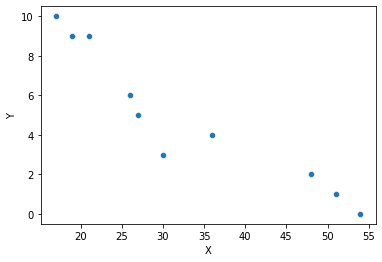

In [9]:
# Your code here.
sns.scatterplot(x=student_data["X"], y=student_data["Y"])

Do you see a trend? Can you make any hypotheses about the relationship between age and number of tardies?

In [10]:
# Your response here. 
"The variables appear to have a descending linear relationship. As said in the initial hypothesis it seems that that the younger the students are, the more often they are late to class"

'The variables appear to have a descending linear relationship. As said in the initial hypothesis it seems that that the younger the students are, the more often they are late to class'

Calculate the covariance and correlation of the variables in your plot. What is the difference between these two measures? Compare their values. What do they tell you in this case? Add your responses as comments after your code.

In [17]:
# Your response here.
lr = LinearRegression()
lr.fit(
    X = student_data[["X"]],
    y = student_data.Y
)

LinearRegression()

In [26]:
corr =lr.coef_
'''cov = lr.covariance_'''

print(f"The covariance is {cov}.\nThe correlation is {corr}")

The covariance is EmpiricalCovariance().
The correlation is [-0.24282077]


Build a regression model for this data. What will be your outcome variable? What type of regression are you using? Add your responses as comments after your code.

In [32]:
# Your response here.
optimal_m = lr.coef_[0]
optimal_n = lr.intercept_
student_data["prediction_1"] = optimal_m * student_data.X + optimal_n
student_data

,X,Y,prediction_1
0,17,10,8.760850
1,51,1,0.504944
2,27,5,6.332643
3,21,9,7.789567
4,36,4,4.147256
5,48,2,1.233406
6,19,9,8.275209
7,26,6,6.575463
8,54,0,-0.223518
9,30,3,5.604180


In [40]:
student_data["prediction_1"].mean

<bound method NDFrame._add_numeric_operations.<locals>.mean of 0    8.760850
1    0.504944
2    6.332643
3    7.789567
4    4.147256
5    1.233406
6    8.275209
7    6.575463
8   -0.223518
9    5.604180
Name: prediction_1, dtype: float64>


Plot your regression model on your scatter plot.

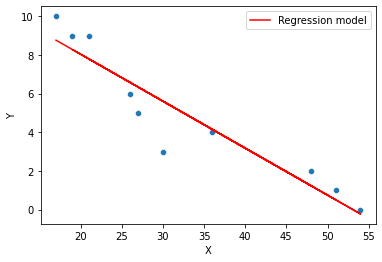

In [37]:
# Your code here.

fig, ax = plt.subplots()
sns.scatterplot(x=student_data["X"], y=student_data["Y"])

plt.plot(student_data.X, student_data.prediction_1, color='r', label='Regression model')

plt.legend()

Interpret the results of your model. What can conclusions can you draw from your model and how confident in these conclusions are you? Can we say that age is a good predictor of tardiness? Add your responses as comments after your code.

In [42]:
# Your response here. 
'''With these results we can asume that more or less our hypothesis is true, because the regression line shows that the younger are the students the more times they get late. Anyway the errors for this aproximation are quite big, so I'm not very confident'''

"With these results we can asume that more or less our hypothesis is true, because the regression line shows that the younger are the students the more times they get late. Anyway the errors for this aproximation are quite big, so I'm not very confident"

## Challenge 2
For the second part of this lab, we will use the vehicles.csv data set. You can find a copy of the dataset in the git hub folder. This dataset includes variables related to vehicle characteristics, including the model, make, and energy efficiency standards, as well as each car's CO2 emissions. As discussed in class the goal of this exercise is to predict vehicles' CO2 emissions based on several independent variables. 

In [66]:
# Import any libraries you may need & the data

import statsmodels.formula.api as smf
veh = pd.read_csv ('vehicles.csv')
veh.head(2)

,Make,Model,Year,Engine Displacement,Cylinders,Transmission,Drivetrain,Vehicle Class,Fuel Type,Fuel Barrels/Year,City MPG,Highway MPG,Combined MPG,CO2 Emission Grams/Mile,Fuel Cost/Year
0,AM General,DJ Po Vehicle 2WD,1984,2.5,4.0,Automatic 3-spd,2-Wheel Drive,Special Purpose Vehicle 2WD,Regular,19.388824,18,17,17,522.764706,1950
1,AM General,FJ8c Post Office,1984,4.2,6.0,Automatic 3-spd,2-Wheel Drive,Special Purpose Vehicle 2WD,Regular,25.354615,13,13,13,683.615385,2550


Let's use the following variables for our analysis: Year, Cylinders, Fuel Barrels/Year, Combined MPG, and Fuel Cost/Year. We will use 'CO2 Emission Grams/Mile' as our outcome variable. 

Calculate the correlations between each of these variables and the outcome. Which variable do you think will be the most important in determining CO2 emissions? Which provides the least amount of helpful information for determining CO2 emissions? Add your responses as comments after your code.

In [83]:
veh.iloc[:,9]

0        19.388824
1        25.354615
2        20.600625
3        25.354615
4        20.600625
           ...    
35947     9.155833
35948     9.155833
35949     9.155833
35950     9.155833
35951     9.417429
Name: Fuel Barrels/Year, Length: 35952, dtype: float64

In [82]:
results = smf.ols('veh.iloc[:,3] ~ veh.iloc[:,13]', data=veh).fit()
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:         veh.iloc[:, 3]   R-squared:                       0.646
Model:                            OLS   Adj. R-squared:                  0.646
Method:                 Least Squares   F-statistic:                 6.550e+04
Date:                Wed, 17 Feb 2021   Prob (F-statistic):               0.00
Time:                        02:15:30   Log-Likelihood:                -43403.
No. Observations:               35952   AIC:                         8.681e+04
Df Residuals:                   35950   BIC:                         8.683e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
===================================================================================
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
Intercept          -1.0222      0.018    -58.196      0.000      -1.057      -0.988
veh.iloc[:, 13]     0.0092   3.58e-05    255.933      0.000       0.009       0.009
==============================================================================
Omnibus:                     2727.806   Durbin-Watson:                   0.471
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             6133.087
Skew:                           0.487   Prob(JB):                         0.00
Kurtosis:                       4.774   Cond. No.                     2.02e+03
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 2.02e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [86]:
results = smf.ols('veh.iloc[:,9] ~ veh.iloc[:,13]', data=veh).fit()
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:         veh.iloc[:, 9]   R-squared:                       0.973
Model:                            OLS   Adj. R-squared:                  0.973
Method:                 Least Squares   F-statistic:                 1.275e+06
Date:                Wed, 17 Feb 2021   Prob (F-statistic):               0.00
Time:                        02:18:15   Log-Likelihood:                -40183.
No. Observations:               35952   AIC:                         8.037e+04
Df Residuals:                   35950   BIC:                         8.039e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
===================================================================================
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
Intercept           0.0210      0.016      1.308      0.191      -0.010       0.052
veh.iloc[:, 13]     0.0370   3.28e-05   1128.967      0.000       0.037       0.037
==============================================================================
Omnibus:                    89519.440   Durbin-Watson:                   0.931
Prob(Omnibus):                  0.000   Jarque-Bera (JB):       1018755233.256
Skew:                         -27.445   Prob(JB):                         0.00
Kurtosis:                     825.839   Cond. No.                     2.02e+03
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 2.02e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [87]:
results = smf.ols('veh.iloc[:,4] ~ veh.iloc[:,13]', data=veh).fit()
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:         veh.iloc[:, 4]   R-squared:                       0.566
Model:                            OLS   Adj. R-squared:                  0.566
Method:                 Least Squares   F-statistic:                 4.690e+04
Date:                Wed, 17 Feb 2021   Prob (F-statistic):               0.00
Time:                        02:18:27   Log-Likelihood:                -56232.
No. Observations:               35952   AIC:                         1.125e+05
Df Residuals:                   35950   BIC:                         1.125e+05
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
===================================================================================
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
Intercept           0.4928      0.025     19.634      0.000       0.444       0.542
veh.iloc[:, 13]     0.0111   5.12e-05    216.569      0.000       0.011       0.011
==============================================================================
Omnibus:                     3839.899   Durbin-Watson:                   0.507
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             8788.804
Skew:                           0.652   Prob(JB):                         0.00
Kurtosis:                       5.042   Cond. No.                     2.02e+03
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 2.02e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

<AxesSubplot:xlabel='Cylinders', ylabel='CO2 Emission Grams/Mile'>

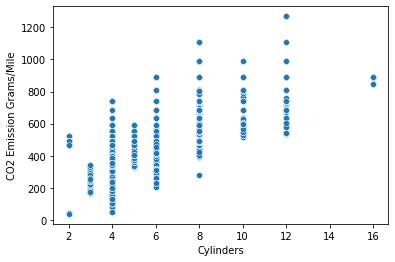

In [64]:
# Your response here. 
sns.scatterplot(x= veh["Cylinders"], y=veh['CO2 Emission Grams/Mile'])

Build a regression model for this data. What type of regression are you using? Add your responses as comments after your code.

In [ ]:
# Your response here. 

Print your regression summary, and interpret the results. What are the most important varibles in your model and why? What can conclusions can you draw from your model and how confident in these conclusions are you? Add your responses as comments after your code.

In [ ]:
# Your response here. 

## Bonus Challenge: Error Analysis

I am suspicious about the last few parties I have thrown: it seems that the more people I invite the more people are unable to attend. To know if my hunch is supported by data, I have decided to do an analysis. I have collected my data in the table below, where X is the number of people I invited, and Y is the number of people who attended. 

|  X |  Y |
|----|----|
| 1  |  1 |
| 3  |  2 |
| 4  |  4 |
| 6  |  4 |
| 8  |  5 |
| 9  |  7 |
| 11 |  8 |
| 14 |  13 |

We want to know if the relationship modeled by the two random variables is linear or not, and therefore if it is appropriate to model it with a linear regression. 
First, build a dataframe with the data. 

In [7]:
# Your code here. 

Draw a dispersion diagram (scatter plot) for the data, and fit a regression line.

In [1]:
# Your code here.

What do you see? What does this plot tell you about the likely relationship between the variables? Print the results from your regression.

In [2]:
# Your response here. 

Do you see any problematic points, or outliers, in your data? Remove these points and recalculate your regression. Print the new dispersion diagram with your new model and the results of your model. 

In [5]:
# Your response here. 

What changed? Based on the results of the two models and your graphs, what can you say about the form of the data with the problematic point and without it?

In [ ]:
# Your response here. 